<a href="https://colab.research.google.com/github/khoalk/BrainTumorDetection-main/blob/main/Brain_Tumor_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In this notebook we're going to build a computer vision model to detect brain tumors. In order to perform that, we'll be using [PyTorch](https://pytorch.org) and in particular we'll start from the [YOLOv5](https://github.com/ultralytics/yolov5) architecture to perform fine-tuning for this task. For building our models  we will use the medium version **YOLOv5m**.

Furthermore, we'll use this dataset from Kaggle called "[Brain Tumor Object Detection Dataset](https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets)" which already includes the labels and the bounding boxes that will be used to train the model.
It counts 1.274 images of MRI scans of the brain taken on 3 different axes:

| Axial       | Coronal     | Sagittal    |
| ----------- | ----------- | ----------- |
| 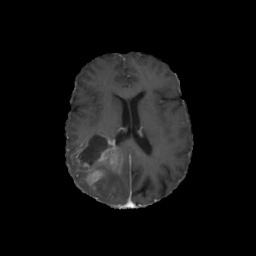      |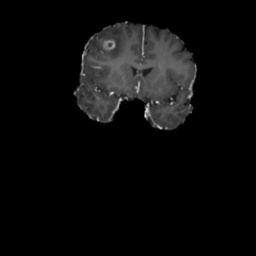        |      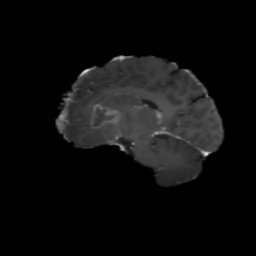       |


Note that this dataset has been already imported in this repository.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Workspace Configuration

In [16]:
# Global imports
import shutil
import zipfile
import os
import torch
import urllib.request
from IPython.display import Image, display

In [17]:
# This block make sense only if runned on Google Collaboratory
if os.path.exists('sample_data'):
  shutil.rmtree('sample_data')

In [19]:
# Clone YOLOv5 Repository
if os.path.exists('yolov5'):
  shutil.rmtree('yolov5/runs')
else:
  !git clone https://github.com/ultralytics/yolov5 
  %cd yolov5
  %pip install -r requirements.txt
  %cd ..

FileNotFoundError: ignored

In [ ]:
# Download and unzip the dataset

if not os.path.isfile('data.zip'):
  urllib.request.urlretrieve("https://github.com/giuseppebrb/BrainTumorDetection/blob/main/data.zip?raw=true", "data.zip")

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

os.remove('data.zip')

In [ ]:
# Folder for fine-tuned models
output_folder = 'output_models'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
else :
  os.makedirs(output_folder)

In [ ]:
#  Check if cuda available / mps available / only CPU
if torch.cuda.is_available():
  device = 0
else:
  device = 'cpu'

# Training

## Axial Plane Model

In [ ]:
# Training axial plane
!python yolov5/train.py --img 480 --batch 64 --epochs 400 --data ./data/axial/axial.yaml --weights yolov5m.pt --device {device} --name axial --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/axial/weights/best.pt', f'{output_folder}/tumor_detector_axial.pt')

### F1 Curve

In [ ]:
display(Image(filename='yolov5/runs/train/axial/F1_curve.png'))

### PR Curve

In [ ]:
display(Image(filename='yolov5/runs/train/axial/PR_curve.png'))

### Confusion Matrix

In [ ]:
display(Image(filename='yolov5/runs/train/axial/confusion_matrix.png'))

### Results summary

In [ ]:
display(Image(filename='yolov5/runs/train/axial/results.png'))

## Coronal Plane Model

In [ ]:
# Training coronal plane
!python yolov5/train.py --img 480 --batch 80 --epochs 200 --data data/coronal/coronal.yaml --weights yolov5m.pt --device 0 --name coronal --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/coronal/weights/best.pt', f'{output_folder}/tumor_detector_coronal.pt')

### F1 Curve

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/F1_curve.png'))

### PR Curve

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/PR_curve.png'))

### Confusion Matrix

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/confusion_matrix.png'))

### Results Summary

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/results.png'))

## Sagittal Plane Model

In [ ]:
# Training sagittal plane
!python yolov5/train.py --img 480 --batch 80 --epochs 200 --data data/sagittal/sagittal.yaml --weights yolov5m.pt --device 0 --name sagittal --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/sagittal/weights/best.pt', f'{output_folder}/tumor_detector_sagittal.pt')

### F1 Curve

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/F1_curve.png'))

### PR Curve

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/PR_curve.png'))

### Confusion Matrix

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/confusion_matrix.png'))

### Results

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/results.png'))

# Testing the models

Let's test our models with never seen images during the training.

## Axial Model

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg --save-txt

display(Image(filename='yolov5/runs/detect/exp/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg'))

## Coronal Model

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_coronal.pt --img 640 --conf 0.4 --source https://www.mriclinicalcasemap.philips.com/content/images/cases/case154/thumbs/14.jpg --save-txt

display(Image(filename='yolov5/runs/detect/exp2/14.jpg'))

## Sagittal Model

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_sagittal.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/4440984/10a4749375e20983b677e0502a9d7f_gallery.jpg --save-txt

display(Image(filename='yolov5/runs/detect/exp3/10a4749375e20983b677e0502a9d7f_gallery.jpg'))